In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



In [3]:
data = pd.read_csv('telecom_churn.csv') 
data.info

<bound method DataFrame.info of         customer_id telecom_partner gender  age              state       city  \
0                 1    Reliance Jio      F   25          Karnataka    Kolkata   
1                 2    Reliance Jio      F   55            Mizoram     Mumbai   
2                 3        Vodafone      F   57  Arunachal Pradesh      Delhi   
3                 4            BSNL      M   46         Tamil Nadu    Kolkata   
4                 5            BSNL      F   26            Tripura      Delhi   
...             ...             ...    ...  ...                ...        ...   
243548       243549          Airtel      F   28            Mizoram    Kolkata   
243549       243550    Reliance Jio      F   52              Assam    Kolkata   
243550       243551    Reliance Jio      M   59            Tripura    Kolkata   
243551       243552            BSNL      M   49     Madhya Pradesh    Kolkata   
243552       243553            BSNL      F   37          Telangana  Hyderabad

In [5]:
df = pd.DataFrame(data)


In [6]:
data.head(5)

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [6]:
print(df.columns)


Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')


In [7]:
data['age'].notnull().sum()




243553

In [8]:
print(data.isnull().sum())

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64


In [9]:
print(data.dtypes)

customer_id              int64
telecom_partner         object
gender                  object
age                      int64
state                   object
city                    object
pincode                  int64
date_of_registration    object
num_dependents           int64
estimated_salary         int64
calls_made               int64
sms_sent                 int64
data_used                int64
churn                    int64
dtype: object


In [10]:
data.drop_duplicates(inplace=True)


In [11]:
data = data[(data['age'] > 0) & (data['age'] < 100)]


In [12]:
data.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [14]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [15]:
data['gender'].nunique()

2

In [16]:
data['calls_made'].value_counts()


calls_made
 86     2554
 70     2549
 23     2542
 66     2541
 40     2537
        ... 
 106     353
 107     240
-9       239
-10      127
 108     118
Name: count, Length: 119, dtype: int64

In [17]:
data.groupby(['estimated_salary', 'gender'])['age'].mean()


estimated_salary  gender
20000             F         53.000000
20001             F         65.000000
                  M         21.000000
20002             M         64.000000
20003             F         53.000000
                              ...    
149995            M         64.666667
149996            M         37.000000
149997            F         61.000000
                  M         56.000000
149999            M         65.000000
Name: age, Length: 156273, dtype: float64

In [18]:
data = data.dropna(subset=['calls_made', 'age'])


In [19]:
data = data[data['calls_made'] >= 0]

In [20]:
data.groupby('gender')['calls_made'].mean()


gender
F    50.492454
M    50.525705
Name: calls_made, dtype: float64

In [21]:
data.groupby('city')['data_used'].mean()

city
Bangalore    4983.554945
Chennai      4995.319280
Delhi        4990.723098
Hyderabad    5005.245749
Kolkata      4999.819869
Mumbai       4978.985220
Name: data_used, dtype: float64

In [23]:

data['telecom_partner'] = data['telecom_partner'].map({'Partner A': 1, 'Partner B': 0})



In [24]:
data.groupby('age')['telecom_partner'].mean()

age
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
50   NaN
51   NaN
52   NaN
53   NaN
54   NaN
55   NaN
56   NaN
57   NaN
58   NaN
59   NaN
60   NaN
61   NaN
62   NaN
63   NaN
64   NaN
65   NaN
66   NaN
67   NaN
68   NaN
69   NaN
70   NaN
71   NaN
72   NaN
73   NaN
74   NaN
Name: telecom_partner, dtype: float64

In [25]:
x = np.random.randn(1000)

<Axes: ylabel='Count'>

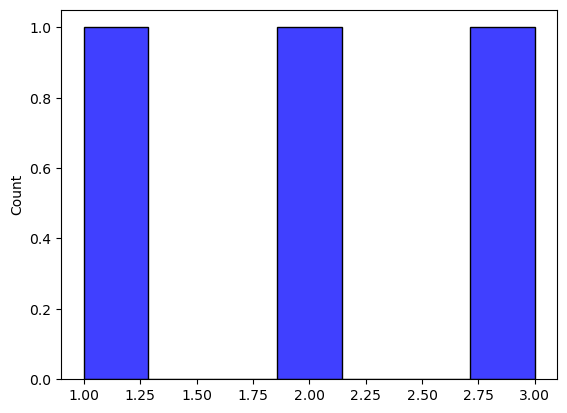

In [26]:
sns.histplot(x=[1,2,3], color='blue', bins=7)

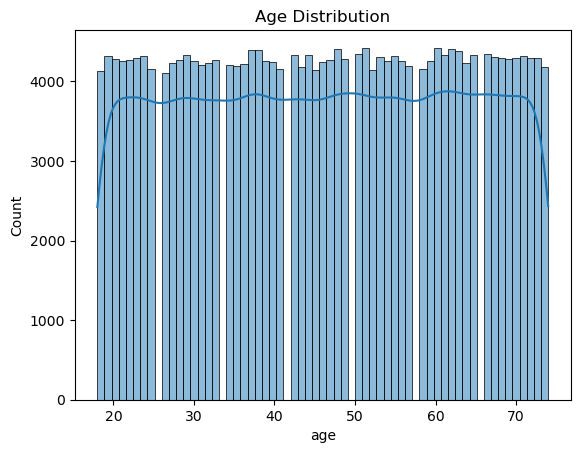

In [7]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

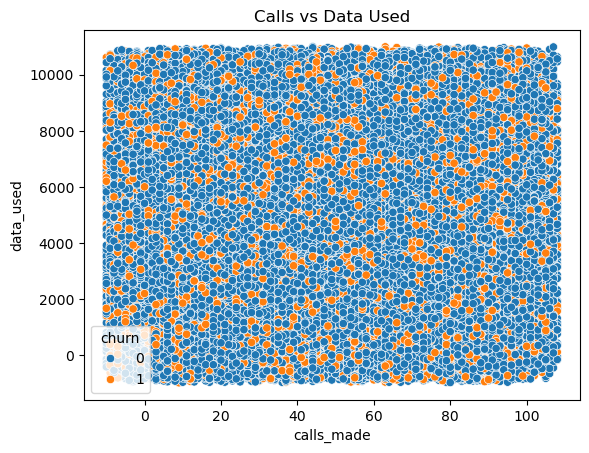

In [8]:
sns.scatterplot(x='calls_made', y='data_used', hue='churn', data=df)
plt.title('Calls vs Data Used')
plt.show()

c:\Users\Danil\anaconda3\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


<Axes: xlabel='gender', ylabel='Count'>

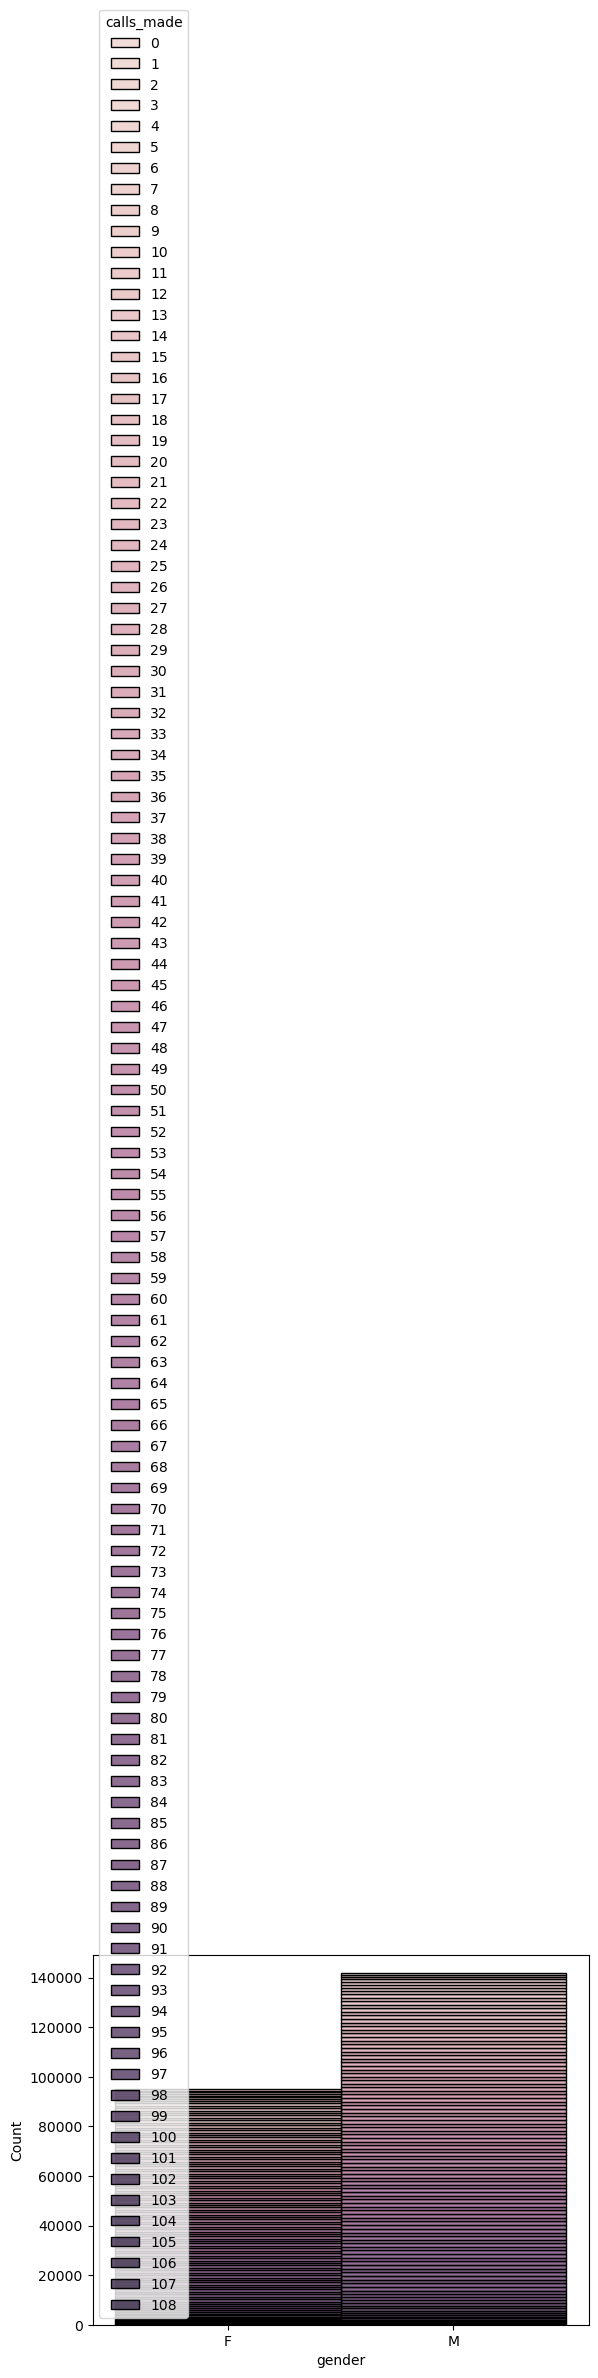

In [29]:
sns.histplot(data,x='gender', hue='calls_made', multiple='stack')

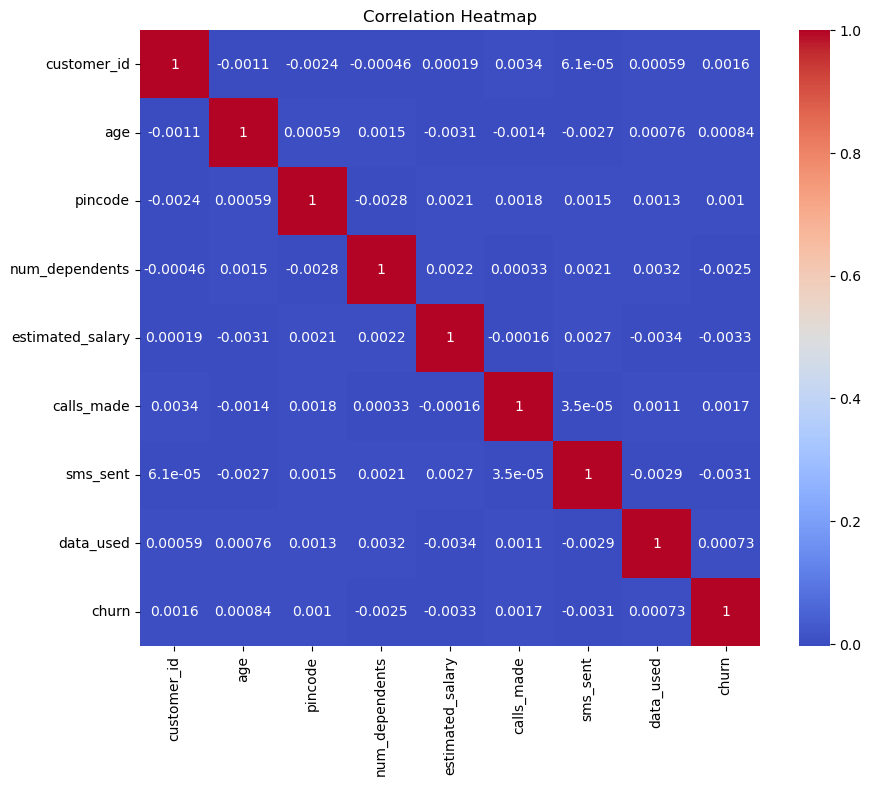

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='city', ylabel='Count'>

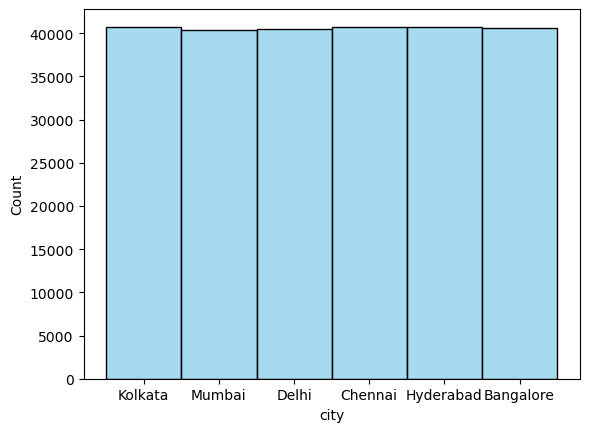

In [32]:
sns.histplot(data=df, x='city', bins=5,color='skyblue')

In [33]:
print(df.columns)

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')


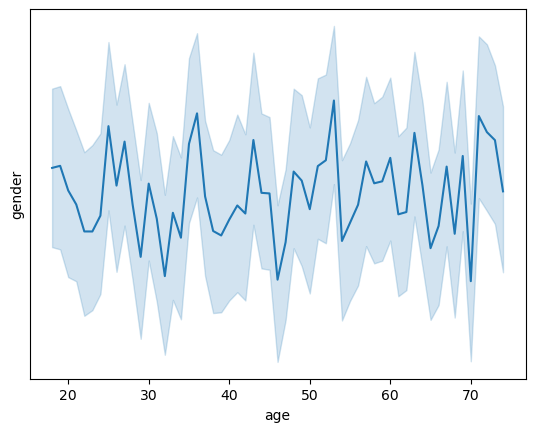

In [34]:
sns.lineplot(data=df, x='age', y='gender')
plt.show()


In [15]:
print(df['date_of_registration'].dtype)


object


In [16]:
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'], errors='coerce')


In [18]:
df['registration_year'] = df['date_of_registration'].dt.year


In [19]:
le = LabelEncoder()
for col in ['telecom_partner', 'gender', 'state', 'city']:
    df[col] = le.fit_transform(df[col])

In [20]:
X = df.drop(['customer_id', 'date_of_registration', 'pincode', 'churn'], axis=1)
y = df['churn']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89     38928
           1       0.67      0.00      0.00      9783

    accuracy                           0.80     48711
   macro avg       0.73      0.50      0.44     48711
weighted avg       0.77      0.80      0.71     48711

ROC-AUC Score: 0.5000893739082605


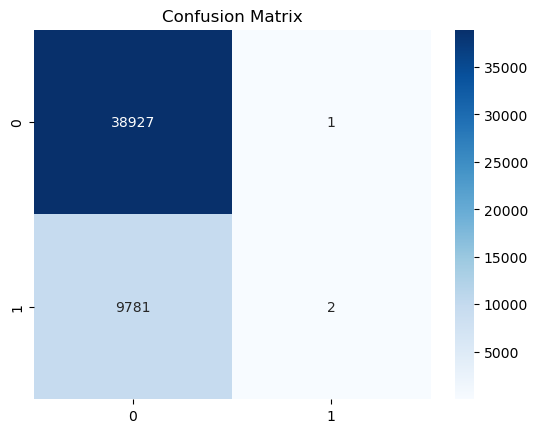

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
